In [ ]:
ownerpath = f'/content/drive/MyDrive/AST 443 Group 5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fitsio
!pip install photutils
!pip install astroquery
!pip install numpy astropy scipy
!pip install sep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitsio: filename=fitsio-1.2.4-cp310-cp310-linux_x86_64.whl size=822254 sha256=54693733ac04d21df654688b5dae7db57a40415de10cf0419e3bba0b75cedf1f
  Stored in directory: /root/.cache/pip/wheels/2d/12/c1/30f33e4d5b539fce39f05630a55ef3643f29aaf4f7597a917c
Successfully built fitsio
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.9/912.9 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00


In [ ]:
import os
from matplotlib import pyplot as plt
from matplotlib import colors
from astropy.io import fits
from IPython.display import Image
import math
import numpy as np
import sep

import glob
import matplotlib.colors as colors
from astropy.io import ascii
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
from astropy.visualization import make_lupton_rgb
from astropy.table import Table
from astroquery.astrometry_net import AstrometryNet
from astropy.stats import sigma_clipped_stats

from photutils.datasets import load_star_image
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
AstrometryNet.key = 'kwbavttkhitkoaeo'

%matplotlib inline

from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from astropy.io import fits
from scipy.ndimage import shift

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dark_frame = []
for i in range(10):
    filename = f'{ownerpath}/Lab 2/Darks/HAT_P_16_VISIBLE_DARK_20S_.0000000{i}.DARK.FIT'
    dark_f = fits.getdata(filename)
    dark_frame.append(dark_f)

In [ ]:
master_dark_data = np.median(dark_frame, axis=0)

In [ ]:
dark_frame_3 = []
for i in range(5):
    filename = f'{ownerpath}/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_3s_.0000000{i}.DARK.FIT'
    dark_f3 = fits.getdata(filename)
    dark_frame_3.append(dark_f3)

In [ ]:
master_dark_data3 = np.median(dark_frame_3, axis=0)

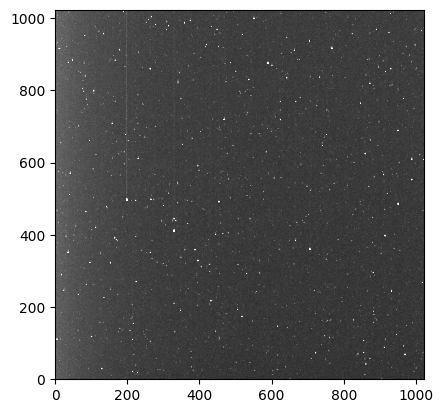

In [ ]:
plt.imshow(master_dark_data3, cmap='gray', vmax=np.mean(master_dark_data3)+(np.std(master_dark_data3)), origin='lower')

In [ ]:
file_num=[1,2,3,4,5,6,7,8,9]
flat_fields_data=[]

for i in range(len(file_num)):
    field_file=f'{ownerpath}/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_2s_visible_.0000000{i}.FLAT.FIT'
    field_file_data=fits.open(field_file)
    flat_fields_data.append(field_file_data[0].data)

# Compute the median flat field
median_flat_field = np.median(flat_fields_data, axis=0)

In [ ]:
# Normalizing the flat field
master_flat_field=(median_flat_field-master_dark_data3)/np.max(median_flat_field)


In [ ]:
master_flat = fits.getdata(f'{ownerpath}/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/Normalized_Master_Flat-Field.FIT')

#master_flat_n = (master_flat - master_dark_data)
#master_flat_normalized = master_flat_n / np.median(master_flat_n)

In [ ]:
science_files = []

for i in range(194):
    if i < 10:
        filename = f'{ownerpath}/Lab 2/Transient/HAT_P_16_VISIBLE_LIGHT_20S_.0000000{i}.FIT'
    elif i < 100 :
        filename = f'{ownerpath}/Lab 2/Transient/HAT_P_16_VISIBLE_LIGHT_20S_.000000{i}.FIT'
    else:
        filename = f'{ownerpath}/Lab 2/Transient/HAT_P_16_VISIBLE_LIGHT_20S_.00000{i}.FIT'
    science_data = fits.getdata(filename)
    science_files.append(science_data)

In [ ]:
calibrated_science_withflat = []
for i in range(194):
    science_corrected = (science_files[i] - master_dark_data)/master_flat_field
    calibrated_science_withflat.append(science_corrected)

    output_file_with = f'{ownerpath}/Lab 2/Subtracted Transient(withflat)/HAT_P_16_VISIBLE_LIGHT_20S_.{i}.fits'
    hdu = fits.PrimaryHDU(science_corrected)
    hdu.writeto(output_file_with, overwrite=True)

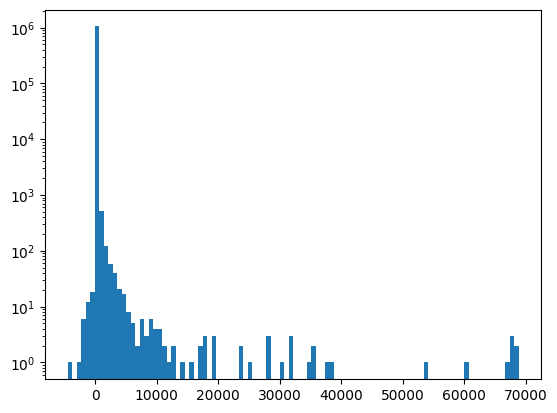

In [ ]:

flatten_cal_science=calibrated_science_withflat[0].flatten()
plt.hist(flatten_cal_science, bins=100)
plt.yscale('log')

In [ ]:
# calibrated_science_withflat = []
# for i in range(194):
#     science_corrected = science_files[i] - master_dark_data
#     calibrated_data_with =  science_corrected / master_flat
#     calibrated_science_withflat.append(calibrated_data_with)

#     output_file_with = f'{ownerpath}/Lab 2/Subtracted Transient(withflat)/HAT_P_16_VISIBLE_LIGHT_20S_.{i}.fits'
#     hdu = fits.PrimaryHDU(calibrated_data_with)
#     hdu.writeto(output_file_with, overwrite=True)

In [ ]:
# calibrated_science_withoutflat = []
# for i in range(194):
#     science_corrected = science_files[i] - master_dark_data
#     calibrated_data_without =  science_corrected / np.mean(science_corrected)
#     calibrated_science_withoutflat.append(calibrated_science_withoutflat)

#     output_file_without = f'{ownerpath}/Lab 2/Subtracted Transient(withoutflat)/HAT_P_16_VISIBLE_LIGHT_20S_.{i}.fits'
#     hdu = fits.PrimaryHDU(calibrated_data_without)
#     hdu.writeto(output_file_without, overwrite=True)

In [ ]:
# data = fits.getdata(f'{ownerpath}/Lab 2/Subtracted Transient(withflat)/HAT_P_16_VISIBLE_LIGHT_20S_.0.fits')
# mean, median, std = sigma_clipped_stats(data, sigma=3.0)
# print(np.array((mean, median, std)))

In [ ]:
# mean, median, std = sigma_clipped_stats(calibrated_science_withflat[0], sigma=3.0)
# print(np.array((mean, median, std)))

In [ ]:
# daofind = DAOStarFinder(fwhm=10.0, threshold=10.*std)
# sources = daofind(calibrated_science_withflat[0] - median)
# for col in sources.colnames:
#     if col not in ('id', 'npix'):
#         sources[col].info.format = '%.2f'
# sources.pprint(max_width=76)
# sources.write(f'{ownerpath}/Lab 2/Calibrated Transient(withflat)/sources.txt', format='ascii', overwrite=True)

In [ ]:
# dir(DAOStarFinder)

In [ ]:
def show_image(data, cmap='gray'):
    """
    Displays an image using the mean and standard deviation for contrast scaling.

    Parameters:
    - data: 2D numpy array, the image data to be displayed.
    - cmap: str, the colormap to be used for displaying the image (default is 'gray').

    Returns:
    - None
    """
    # Calculate the min and max values for display scaling
    mi = np.mean(data) - np.std(data)
    ma = np.mean(data) + 2*np.std(data)

    # Display the image with the specified scaling
    plt.imshow(data, cmap=cmap, origin='lower', vmin=mi, vmax=ma)
    plt.colorbar()
    plt.show()

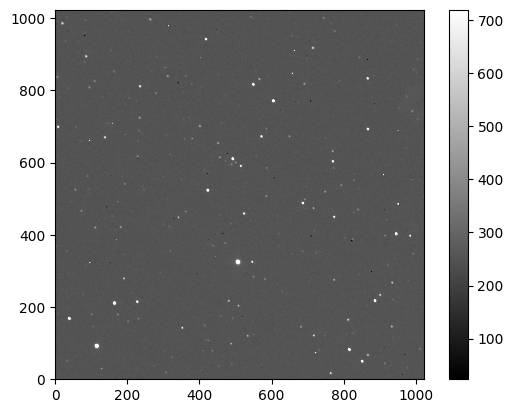

255.47273504528386


In [ ]:
# norm = simple_norm(calibrated_science_withflat[0], 'sqrt')

# positions = np.transpose((426.9475, 798.2625))
# apertures = CircularAperture(positions, r=5.0)
#apertures.plot(color='blue', lw=1.5, alpha=0.5)

show_image(calibrated_science_withflat[0])
print(np.mean(calibrated_science_withflat[0]))

In [ ]:
good_frames=[]
for i in range(len(calibrated_science_withflat)):
    if np.mean(calibrated_science_withflat[i])<300:
        good_frames.append([calibrated_science_withflat[i]])
        print(np.mean(calibrated_science_withflat[i]))

255.47273504528386
255.03353455068535
254.91020309521517
252.89504597569675
251.0264978062323
251.6801497570081
252.11492689318536
254.58856478651416
253.44232093132393
252.80492076508165
252.24639054919706
253.0719565519303
253.7047340400001
252.00116785778303
252.9276972794943
255.460363056205
254.35443605145255
256.91702849175215
254.89484053327894
254.62686875913215
253.68933577339953
256.0538118578841
256.7182981860944
258.2279917388413
260.8410919602533
261.9061116678273
251.2313992052915
252.89615452630667
250.28473498662086
265.4310982279157
277.51173310759737
259.9950943186133
256.788732914139
263.58929586138674
265.57181671475695
262.6742892895711
272.3286446958635
282.7532028322931
277.21967000251334
262.8490318826862
268.49226164495076
263.0911694678194
255.60746814000356
252.88733814498676
267.9383047946953
265.83346398828394
268.94145909288403
262.52830714642266
274.13678938888415
275.2035266030622
259.87667069628066
255.82209826945595
252.22003989890396
279.7293448994678

In [ ]:
#positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
#apertures = CircularAperture(positions, r=5.0)
#norm = ImageNormalize(stretch=SqrtStretch())
#plt.imshow(calibrated_science_withflat[0], cmap='Greys', origin='lower', norm=norm,
#           interpolation='nearest')
#apertures.plot(color='blue', lw=1.5, alpha=0.5)
#plt.show()

In [ ]:
# ast = AstrometryNet()
# ast.api_key = 'zxdmyndauvanohii'

# sources = Table.read(f'{ownerpath}/Lab 2/Subtracted Transient(withflat)/sources.txt', format='ascii')
# # Sort sources in ascending order
# sources.sort('flux')
# # Reverse to get descending order
# sources.reverse()

# image_width = 1024
# image_height = 1024
# wcs_header = ast.solve_from_source_list(sources['xcentroid'], sources['ycentroid'],
#                                         image_width, image_height, solve_timeout=120)

In [ ]:
# ast = AstrometryNet()
# ast.api_key = 'kwbavttkhitkoaeo'

# sources = Table.read(f'{ownerpath}/Lab 2/Calibrated Transient(withflat)/sources.txt', format='ascii')
# # Sort sources in ascending order
# sources.sort('flux')
# # Reverse to get descending order
# sources.reverse()

# image_width = 1024
# image_height = 1024
# wcs_header = ast.solve_from_source_list(sources['xcentroid'], sources['ycentroid'],
#                                         image_width, image_height, solve_timeout=120)

In [ ]:
# wcs_header

In [ ]:
aligned_images = []
aligned_number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
    17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 33,
    36, 37, 38, 39, 40, 42, 43, 59, 63, 70, 71, 72, 74, 75,
    76, 82, 83, 84, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96,
    97, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112,
    114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
    125, 126, 127]

for i in range(len(aligned_number)):
    aligned_file=f'{ownerpath}/Lab 2/Aligned Images/aligned_HAT_P_16_VISIBLE_LIGHT_20S_.{aligned_number[i]}.fits'
    aligned_file_data=fits.getdata(aligned_file)
    aligned_file_data = aligned_file_data.byteswap(inplace=True).newbyteorder()
    aligned_images.append(aligned_file_data)

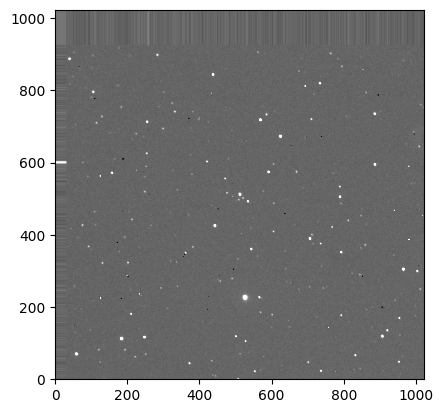

In [ ]:
plt.imshow(aligned_images[25], cmap='gray', origin='lower', vmin=100, vmax=500)

In [ ]:
(aligned_images[0]).shape

(1024, 1024)

In [ ]:
# Define the cropping coordinates
x_min, x_max = 200, 800
y_min, y_max = 200, 800

#fig = plt.figure(figsize=(18, 3))  # width, height in inches
cropped_aligned_frames=[]

#Plot each flat frame
for i in range(len(aligned_images)):
        # Crop the image
    cropped_aligned_frames.append(aligned_images[i][y_min:y_max, x_min:x_max])

In [ ]:
len(aligned_number)

84

In [ ]:
#remove background

cropped_bkgsub=[]
cbkg_rms=[]

for i in range(len(cropped_aligned_frames)):
    bkg = sep.Background(np.ascontiguousarray(cropped_aligned_frames[i]), bw=100, bh=100)
    cbkg_rms.append(bkg.globalrms)
    cropped_bkgsub.append(cropped_aligned_frames[i]-bkg)

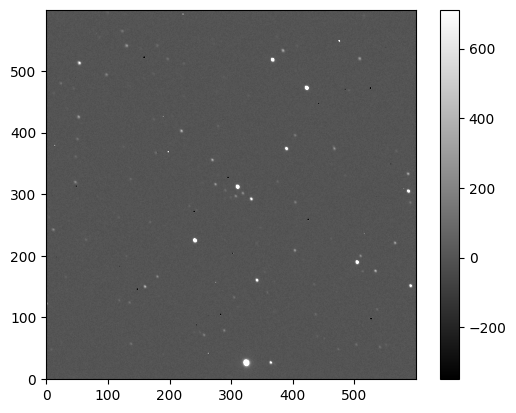

13.252641677856445


In [ ]:
show_image(cropped_bkgsub[0])
print(cbkg_rms[55])

In [ ]:
#extract objects from frame

frame_objects=[]
for i in range(len(cropped_bkgsub)):
    objects = sep.extract(cropped_bkgsub[i], 12, err=cbkg_rms[i])
    frame_objects.append(objects)

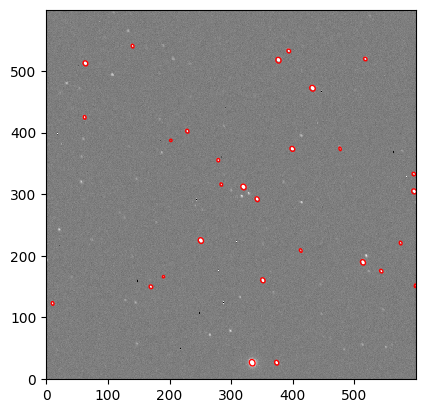

In [ ]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(cropped_bkgsub[20]), np.std(cropped_bkgsub[20])
im = ax.imshow(cropped_bkgsub[20], interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(frame_objects[20])):
    e = Ellipse(xy=(frame_objects[20]['x'][i], frame_objects[20]['y'][i]),
                width=6*frame_objects[20]['a'][i],
                height=6*frame_objects[20]['b'][i],
                angle=frame_objects[20]['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [ ]:
#Extract flux and flux error

fluxes=[]
flux_err=[]
flags=[]

for i in range(len(cropped_bkgsub)):
    flux, fluxerr, flag = sep.sum_circle(cropped_bkgsub[i], frame_objects[i]['x'], frame_objects[i]['y'],
                                     6.6, err=cbkg_rms[i], gain=2.0)
    fluxes.append(flux)
    flux_err.append(fluxerr)
    flags.append(flag)

In [ ]:
for i in range(len(frame_objects[0]['x'])):
    print(i,"object {:.3f} {:.3f}: flux = {:f} +/- {:f}".format(frame_objects[0]['x'][i],frame_objects[0]['y'][i], fluxes[0][i], flux_err[0][i]))

0 object 364.063 26.244: flux = 13030.312391 +/- 164.741435
1 object 324.430 26.162: flux = 1045695.193824 +/- 737.185224
2 object 0.927 122.044: flux = 3806.720982 +/- 122.607006
3 object 160.307 149.421: flux = 5848.264042 +/- 153.475540
4 object 590.887 150.749: flux = 15876.214049 +/- 168.987177
5 object 341.733 159.822: flux = 18408.260392 +/- 172.709914
6 object 180.191 165.805: flux = 2984.720878 +/- 148.474378
7 object 533.920 174.755: flux = 5581.002074 +/- 153.059256
8 object 504.173 189.083: flux = 39329.920562 +/- 200.722556
9 object 403.143 208.293: flux = 4384.638317 +/- 151.012757
10 object 565.645 220.376: flux = 4806.355543 +/- 151.709299
11 object 241.096 224.459: flux = 68979.562270 +/- 234.713153
12 object 11.428 241.803: flux = 3356.047576 +/- 149.179106
13 object 332.564 291.566: flux = 14073.030544 +/- 166.243791
14 object 318.869 300.889: flux = 3653.212688 +/- 149.857318
15 object 587.425 304.192: flux = 22345.104693 +/- 178.182306
16 object 310.363 311.430: fl

In [ ]:
len(frame_objects)

84

In [ ]:
for i in range(len(fluxes)):
    for j in range(len(fluxes[i])):
        if frame_objects[i]['x'][j] > 309 and frame_objects[i]['x'][j] <320:
            if frame_objects[i]['y'][j] > 309 and frame_objects[i]['y'][j] <315:
                print(i, frame_objects[i]['x'][j], frame_objects[i]['y'][j], fluxes[i][j], flux_err[i][j])

0 310.3625818833796 311.4302918302756 71522.1579304528 237.38052004357692
1 310.70663619893463 311.345795487723 71705.40215032813 248.5552564116014
2 311.17876953203694 312.463384832206 70784.51424050091 246.68014372832212
3 310.7205185995661 311.35783273042927 71871.16619068025 234.1372371715475
4 310.2071814680979 311.72131507613886 71655.65616809131 248.35662130445488
5 310.73006097569254 312.0874104230899 71420.42825445117 246.50640627575837
6 311.1089968952539 311.6355337244736 71419.06017526028 246.7932329923447
7 310.8559020324603 311.5227588768919 71443.67436377406 242.97496026378482
8 311.6364422015268 312.0146678692004 71275.67137122391 237.1733564666217
9 311.19875064357495 311.49307550370264 71788.338317242 234.11837116555964
10 310.7190129155899 311.8210236741458 71001.8307976484 252.93861397065973
11 311.0828296002561 311.7021252173207 71492.9198988557 238.53099571893404
12 310.6519450109596 311.5221094676886 70383.2034537673 238.22480572420008
13 311.65449195414305 311.0

In [ ]:


def extract_flux_table(frame_objects, fluxes, flux_err, x_min, x_max, y_min, y_max):
    """
    Extracts the flux and flux error of objects within a specified pixel range and stores them in a table.

    Parameters:
    - frame_objects: list of dictionaries, where each dictionary contains 'x' and 'y' coordinates of objects in a frame.
    - fluxes: list of lists, where each sublist contains flux values for objects in a frame.
    - flux_err: list of lists, where each sublist contains flux error values for objects in a frame.
    - x_min: int, the minimum x-coordinate range.
    - x_max: int, the maximum x-coordinate range.
    - y_min: int, the minimum y-coordinate range.
    - y_max: int, the maximum y-coordinate range.

    Returns:
    - table: Astropy Table containing columns 'frame', 'x', 'y', 'flux', and 'flux_err'.
    """
    # Define lists to store the data
    frame_list = []
    x_list = []
    y_list = []
    flux_list = []
    flux_err_list = []

    # Iterate through each frame and each object's coordinates
    for i in range(len(fluxes)):
        for j in range(len(fluxes[i])):
            # Check if the object's coordinates are within the specified range
            x = frame_objects[i]['x'][j]
            y = frame_objects[i]['y'][j]
            if x_min < x < x_max and y_min < y < y_max:
                # Append the data to respective lists
                frame_list.append(i)
                x_list.append(x)
                y_list.append(y)
                flux_list.append(fluxes[i][j])
                flux_err_list.append(flux_err[i][j])

    # Create a table with the gathered data
    table = Table([frame_list, x_list, y_list, flux_list, flux_err_list],
                  names=('frame', 'x', 'y', 'flux', 'flux_err'))

    return table

In [ ]:
host_planet= extract_flux_table(frame_objects, fluxes, flux_err, 309, 320, 309, 315)

In [ ]:
for i in range(len(fluxes)):
    for j in range(len(fluxes[i])):
        if fluxes[i][j] > 9500 and fluxes[i][j] <100000:
            if not host_planet['flux'][i]==fluxes[i][j]:
                 print(i, frame_objects[i]['x'][j], frame_objects[i]['y'][j], fluxes[i][j], flux_err[i][j])

0 364.06348006215933 26.243966808649567 13030.312391373363 164.74143466480473
0 590.8872872385181 150.74936764648956 15876.214049126509 168.98717652382652
0 341.73258075003724 159.82151141397776 18408.260392373315 172.70991371637618
0 504.1726005399627 189.0826285803999 39329.92056216418 200.7225557350582
0 241.09643771893838 224.45868737396364 68979.56227037312 234.7131527113868
0 332.56367027953297 291.5657222430053 14073.030543749332 166.2437914401825
0 587.425066827472 304.1919592446407 22345.104692609304 178.18230576473542
0 389.62967062200477 373.21881226638624 22088.88571999491 177.8563330076556
0 422.4193433858576 471.796634013125 63673.89599928498 228.91325682750636
0 53.639657682700154 511.96089562563975 14531.21885751009 166.96749066476048
0 367.1412759409346 517.3109713768512 35639.40861175417 196.04141862374115
1 364.43832617920907 26.18335467371446 13142.101397073007 180.2301516076378
1 591.2170609369914 150.7495341614361 16105.101630621428 184.29435060599744
1 342.073886

In [ ]:
# reference_star_1= extract_flux_table(frame_objects, fluxes, flux_err, 363.9476029334338, 365.9262928489079, 25.760355507546407, 27.383059608692506)
# reference_star_2= extract_flux_table(frame_objects, fluxes, flux_err, 590.8054497427934, 592.5538406432704, 150.3888335234611, 151.8142464596994)
# reference_star_3= extract_flux_table(frame_objects, fluxes, flux_err, 341.61174624439514, 343.3596409018714, 159.44951879026888, 160.94036875683386)
# reference_star_4= extract_flux_table(frame_objects, fluxes, flux_err, 504.0440846374132, 505.8041438890214, 188.6671699108461, 190.14533884923551)
# reference_star_5= extract_flux_table(frame_objects, fluxes, flux_err, 240.9930939608208, 242.6546714476923, 223.86177971469291, 225.5662476380141)
# reference_star_6= extract_flux_table(frame_objects, fluxes, flux_err, 332.4245130656536, 334.1069052554858, 291.0287922845138, 292.615029265007)
# reference_star_7= extract_flux_table(frame_objects, fluxes, flux_err, 587.2689095398096, 588.8302155153921, 303.85929677051473, 305.32253085354364)
# reference_star_8= extract_flux_table(frame_objects, fluxes, flux_err, 389.4510972644726, 391.0421558820256, 372.84644135255337, 374.3059639602824)
# reference_star_9= extract_flux_table(frame_objects, fluxes, flux_err, 422.2612691909836, 423.7883211860701, 471.44374866072366, 472.97426922408266)
# reference_star_10= extract_flux_table(frame_objects, fluxes, flux_err, 53.54883706315202, 55.13588108155239, 511.259072945376, 513.2838655701547)
# reference_star_11= extract_flux_table(frame_objects, fluxes, flux_err, 366.9755960466421, 368.5111767531758, 516.9240447317924, 518.5150819373945)
# nofr = 11

In [ ]:
reference_star_1= extract_flux_table(frame_objects, fluxes, flux_err, 362, 374, 24, 28)
reference_star_2= extract_flux_table(frame_objects, fluxes, flux_err, 589, 599, 150, 154)
reference_star_3= extract_flux_table(frame_objects, fluxes, flux_err, 340, 352, 158, 162)
reference_star_4= extract_flux_table(frame_objects, fluxes, flux_err, 503, 514, 187, 191)
reference_star_5= extract_flux_table(frame_objects, fluxes, flux_err, 240, 251, 222, 226)
reference_star_6= extract_flux_table(frame_objects, fluxes, flux_err, 332, 344, 289, 293)
reference_star_7= extract_flux_table(frame_objects, fluxes, flux_err, 586, 598, 302, 306)
reference_star_8= extract_flux_table(frame_objects, fluxes, flux_err, 388, 400, 371, 375)
reference_star_9= extract_flux_table(frame_objects, fluxes, flux_err, 420, 432, 470, 474)
reference_star_10= extract_flux_table(frame_objects, fluxes, flux_err, 53, 64, 510, 514)
reference_star_11= extract_flux_table(frame_objects, fluxes, flux_err, 366, 378, 515, 519)
nofr = 11

In [ ]:
length = []

length.append(len(reference_star_1))
length.append(len(reference_star_2))
length.append(len(reference_star_3))
length.append(len(reference_star_4))
length.append(len(reference_star_5))
length.append(len(reference_star_6))
length.append(len(reference_star_7))
length.append(len(reference_star_8))
length.append(len(reference_star_9))
length.append(len(reference_star_10))
length.append(len(reference_star_11))
print(length)
range_len = max(length)
print(range_len)

[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84]
84


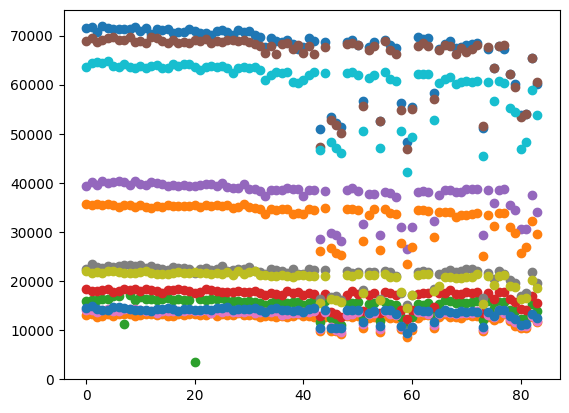

In [ ]:
# Get the minimum length among all the data
min_len = min(len(host_planet), len(reference_star_1), len(reference_star_2),
              len(reference_star_3), len(reference_star_4), len(reference_star_5),
              len(reference_star_6), len(reference_star_7), len(reference_star_8),
              len(reference_star_9), len(reference_star_10), len(reference_star_11))
# Use the minimum length for the x-axis
x_axis = np.arange(min_len)
# Plot the data, truncating to the minimum length
plt.scatter(x_axis, host_planet['flux'][:min_len], label='host_planet')
plt.scatter(x_axis, reference_star_1['flux'][:min_len], label='reference_star_1')
plt.scatter(x_axis, reference_star_2['flux'][:min_len], label='reference_star_2')
plt.scatter(x_axis, reference_star_3['flux'][:min_len], label='reference_star_3')
plt.scatter(x_axis, reference_star_4['flux'][:min_len], label='reference_star_4')
plt.scatter(x_axis, reference_star_5['flux'][:min_len], label='reference_star_5')
plt.scatter(x_axis, reference_star_6['flux'][:min_len], label='reference_star_6')
plt.scatter(x_axis, reference_star_7['flux'][:min_len], label='reference_star_7')
plt.scatter(x_axis, reference_star_8['flux'][:min_len], label='reference_star_8')
plt.scatter(x_axis, reference_star_9['flux'][:min_len], label='reference_star_9')
plt.scatter(x_axis, reference_star_10['flux'][:min_len], label='reference_star_10')
plt.scatter(x_axis, reference_star_11['flux'][:min_len], label='reference_star_11')
#plt.legend()  # Add a legend to distinguish the stars
plt.show()

In [ ]:
#plt.scatter(np.arange(len(fluxes)), host_planet['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_1['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_2['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_3['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_4['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_5['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_6['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_7['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_8['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_9['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_10['flux'])
#plt.scatter(np.arange(len(fluxes)), reference_star_11['flux'])

In [ ]:
reference_star = []
for i in range(1, nofr+1):
    reference_star.append(np.array(eval(f'reference_star_{i}')))

In [ ]:
reference_star_1

frame,x,y,flux,flux_err
int64,float64,float64,float64,float64
0,364.06348006215933,26.243966808649567,13030.312391373363,164.74143466480473
1,364.43832617920907,26.18335467371446,13142.101397073007,180.2301516076378
2,364.863629747468,27.383059608692506,12649.361373227237,178.27932262657052
3,364.5024722084077,26.070733424033133,12871.213978504538,159.08878710944532
4,363.94760293343387,26.470739582923933,13281.801540311573,180.26115508304758
5,364.40306658982104,26.91054945918457,12844.124436856508,177.33577695574184
6,364.7827213644536,26.397940908853986,13241.724212943316,178.2113651084996
7,364.4417564659781,26.344077409206452,13204.509569554326,173.044797609178
8,365.23326678558976,26.7520010882867,13132.7907753551,164.89940969972628


# 4.4

In [ ]:
ref_flux_ = []

for i in range(nofr):
    ref_flux_.append([])

In [ ]:
ref_flux_err_ = []

for i in range(nofr):
    ref_flux_err_.append([])

In [ ]:
len(reference_star_1)

84

In [ ]:
mean_ref = []
for i in range(nofr):
    target_ref_star = reference_star[i]
    for j in range(length[i]):
        target_flux = target_ref_star[j][3]
        ref_flux_[i].append(target_flux)

        target_flux_err = target_ref_star[j][4]
        ref_flux_err_[i].append(target_flux_err)

    target_mean = np.mean(ref_flux_[i])
    mean_ref.append(target_mean)

In [ ]:
mean_ref

[12355.230683750742,
 14966.736609956879,
 16977.95537461225,
 37314.103148567396,
 65473.906627538745,
 13071.298877608831,
 21286.638632578968,
 20402.21580602477,
 59905.85864441622,
 13451.652703410608,
 33138.76401279077]

In [ ]:
final_ref_flux_ = []

for i in range(nofr):
    final_ref_flux_.append([])

In [ ]:
final_ref_flux_err_ = []

for i in range(nofr):
    final_ref_flux_err_.append([])

In [ ]:
for i in range(nofr):
    needed_ref_flux = ref_flux_[i]
    needed_ref_flux_err = ref_flux_err_[i]
    for j in range(len(reference_star_1)):
        final_ref_flux = needed_ref_flux[j]/mean_ref[i]
        final_ref_flux_[i].append(final_ref_flux)

        final_ref_flux_err = needed_ref_flux_err[j]/mean_ref[i]
        final_ref_flux_err_[i].append(final_ref_flux_err)

# 4.5

In [ ]:
mu_ref_up = []
mu_ref_down = []

for j in range(len(reference_star_1)):
    a = 0
    b = 0
    for i in range(nofr):
        a += float(final_ref_flux_[i][j])/((float(final_ref_flux_err_[i][j]))**2)
        b += 1/((float(final_ref_flux_err_[i][j]))**2)

    mu_ref_up.append(a)
    mu_ref_down.append(b)

In [ ]:
mu = []
delta_ref = []

for i in range(len(reference_star_1)):
    c = mu_ref_up[i]/mu_ref_down[i]
    d = math.sqrt(1/mu_ref_down[i])
    mu.append(c)
    delta_ref.append(d)

In [ ]:
mu

[1.0619343231596494,
 1.0712996516656843,
 1.0641179167017025,
 1.0667538061069004,
 1.0714076748004016,
 1.0686239352731535,
 1.0656173641749025,
 1.058853775749421,
 1.0676578847251421,
 1.0597599351779916,
 1.063246740249904,
 1.0569167214250639,
 1.0649903920985826,
 1.0629980508259078,
 1.0574831344585423,
 1.0558449857360748,
 1.0615017768173736,
 1.058362782490147,
 1.0605603733998519,
 1.0587781113893104,
 1.0102601679311793,
 1.0550049122805505,
 1.0629123790292123,
 1.058064674412598,
 1.0583383441832739,
 1.0600234681081084,
 1.0574919066151887,
 1.0475566585408043,
 1.0554518646475768,
 1.059573850082446,
 1.0529738708935734,
 1.0505893614353257,
 1.0393398740461666,
 1.0150548729163797,
 1.037059155823386,
 1.0329053394547827,
 1.0391661555008531,
 1.0412450079718605,
 1.025333914257269,
 1.0282694422023628,
 1.0150548729163797,
 1.037059155823386,
 1.0329053394547827,
 0.7573017044756992,
 1.037732992165525,
 0.8032464138049196,
 0.7846118665923463,
 0.7617781845190283,
 

In [ ]:
host_planet_flux = []
host_planet_err = []

for i in range(len(reference_star_1)):
    host_planet_flux.append(host_planet[i][3])
    host_planet_err.append(host_planet[i][4])

host_mean = np.mean(host_planet_flux)

In [ ]:
host = []
host_err = []

for i in range(len(reference_star_1)):
    e = host_planet_flux[i]/host_mean
    host.append(e)
    f = host_planet_err[i]/host_mean
    host_err.append(f)

In [ ]:
host

[1.0717232114462891,
 1.0744690330138476,
 1.0606699953916638,
 1.0769529229691988,
 1.073723614735344,
 1.0701988439185381,
 1.0701783439466919,
 1.0705471750603557,
 1.068029735543451,
 1.075711789352889,
 1.0639263736283642,
 1.0712850943924095,
 1.054656557072809,
 1.0695313874398966,
 1.0656311160848213,
 1.0699379491287069,
 1.0583324484177619,
 1.0589388725587605,
 1.0593237608594122,
 1.0682568857732289,
 1.0623686216533512,
 1.0571332102647706,
 1.0566125336161767,
 1.0515497124258053,
 1.0644494507394502,
 1.065438791860137,
 1.0613178471798803,
 1.0507472521910015,
 1.0676303859253102,
 1.0611217120053154,
 1.0621703691773867,
 1.0523015657645534,
 1.0445339375419875,
 1.013272865140182,
 1.042920983251275,
 1.0319999868891692,
 1.028348568108423,
 1.0346045846789766,
 1.0243502512534468,
 1.0095586326698862,
 1.013272865140182,
 1.042920983251275,
 1.0319999868891692,
 0.7631526048956618,
 1.0305771584615009,
 0.7990909893802741,
 0.7816304295604678,
 0.7707311895631996,
 1

In [ ]:
r = []

for i in range(len(reference_star_1)):
    g = host[i]/mu[i]
    r.append(g)

In [ ]:
r

[1.0092179789965863,
 1.0029584452335398,
 0.996759831541296,
 1.009560890998383,
 1.0021615860978164,
 1.0014737725718095,
 1.00428012898919,
 1.011043450548834,
 1.0003482864910462,
 1.015052328027685,
 1.0006392057014917,
 1.013594612211237,
 0.9902967809827744,
 1.0061461416687572,
 1.0077050700486594,
 1.013347568613784,
 0.9970142976028603,
 1.0005443219264174,
 0.9988340008061253,
 1.0089525598252882,
 1.0515792420371082,
 1.0020173346677785,
 0.9940730341114388,
 0.9938425673360566,
 1.0057742465722455,
 1.0051086828876474,
 1.0036179383887085,
 1.0030457480501738,
 1.011538679958465,
 1.0014608343937035,
 1.0087338333248563,
 1.0016297560132232,
 1.0049974638956172,
 0.9982444222241131,
 1.0056523558901853,
 0.9991234893159799,
 0.989590127300464,
 0.9936226121210242,
 0.999040641307047,
 0.9818035927505523,
 0.9982444222241131,
 1.0056523558901853,
 0.9991234893159799,
 1.0077259834295678,
 0.9931043594469408,
 0.9948267127580919,
 0.9962001122353309,
 1.011752771641556,
 0.9

In [ ]:
#final_ref_flux_err_[0]

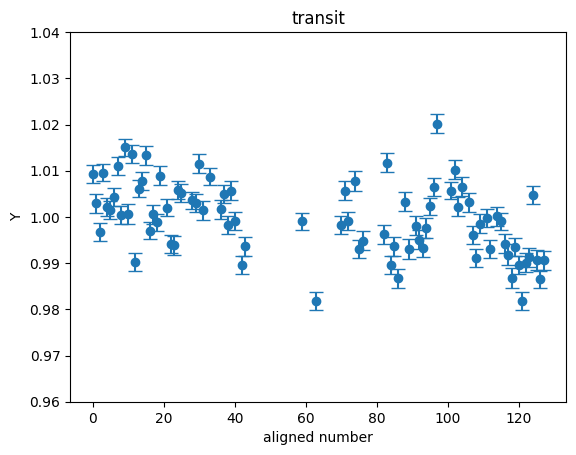

In [ ]:
x = aligned_number
y = r

#plt.scatter(x, y)
plt.errorbar(x, y, yerr=delta_ref, fmt='o', capsize=5)
plt.ylim(0.96,1.04)
plt.xlabel('aligned number')
plt.ylabel('Y')
plt.title('transit')

plt.show()

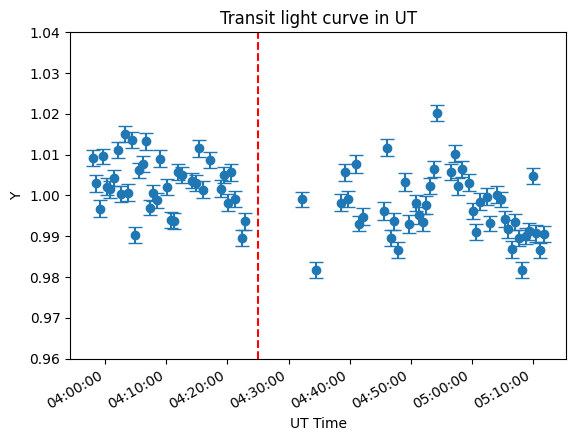

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# List of frame times in UT (as strings)
frame_times_ut = [
    "03:57:55", "03:58:30", "03:59:05", "03:59:40", "04:00:15", "04:00:50",
    "04:01:25", "04:01:59", "04:02:35", "04:03:10", "04:03:45", "04:04:20",
    "04:04:55", "04:05:30", "04:06:05", "04:06:40", "04:07:15", "04:07:49",
    "04:08:24", "04:08:59", "04:09:34", "04:10:09", "04:10:44", "04:11:19",
    "04:11:54", "04:12:29", "04:14:13", "04:14:48", "04:15:23", "04:15:58",
    "04:17:08", "04:18:52", "04:19:27", "04:20:02", "04:20:37", "04:21:12",
    "04:22:22", "04:22:57", "04:32:15", "04:34:35", "04:38:39", "04:39:14",
    "04:39:49", "04:40:59", "04:41:33", "04:42:08", "04:45:38", "04:46:13",
    "04:46:48", "04:47:22", "04:47:57", "04:49:07", "04:49:42", "04:50:52",
    "04:51:27", "04:52:01", "04:52:36", "04:53:11", "04:53:46", "04:54:21",
    "04:56:41", "04:57:15", "04:57:50", "04:58:25", "04:59:35", "05:00:10",
    "05:00:45", "05:01:20", "05:02:29", "05:03:04", "05:04:14", "05:04:49",
    "05:05:24", "05:05:59", "05:06:34", "05:07:09", "05:07:43", "05:08:18",
    "05:08:53", "05:09:28", "05:10:03", "05:10:38", "05:11:13", "05:11:48"
]

# Convert times to datetime objects in UT
times_ut = [datetime.strptime(t, "%H:%M:%S") for t in frame_times_ut]

# x-axis will now be the original UT times
x = times_ut
y = r  # Your flux data

# Plot the updated graph
plt.errorbar(x, y, yerr=delta_ref, fmt='o', capsize=5)
plt.ylim(0.96, 1.04)
plt.xlabel('UT Time')
plt.ylabel('Y')
plt.title('Transit light curve in UT')
plt.axvline(datetime.strptime("04:25:00", "%H:%M:%S"), color='r', linestyle='--', label='04:25:00')

# Format the x-axis to display HH:MM:SS in UT
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()

plt.show()

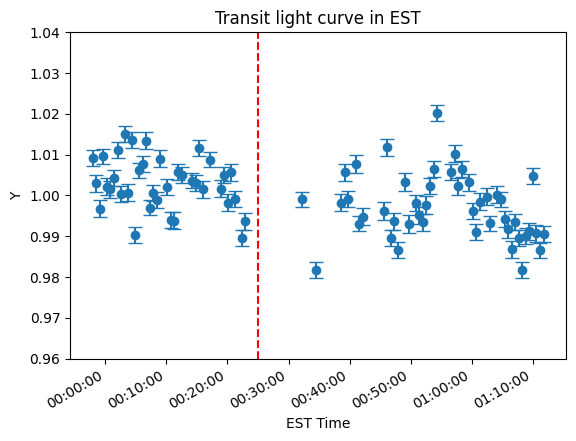

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# List of frame times in UT (as strings)
frame_times_ut = [
    "03:57:55", "03:58:30", "03:59:05", "03:59:40", "04:00:15", "04:00:50",
    "04:01:25", "04:01:59", "04:02:35", "04:03:10", "04:03:45", "04:04:20",
    "04:04:55", "04:05:30", "04:06:05", "04:06:40", "04:07:15", "04:07:49",
    "04:08:24", "04:08:59", "04:09:34", "04:10:09", "04:10:44", "04:11:19",
    "04:11:54", "04:12:29", "04:14:13", "04:14:48", "04:15:23", "04:15:58",
    "04:17:08", "04:18:52", "04:19:27", "04:20:02", "04:20:37", "04:21:12",
    "04:22:22", "04:22:57", "04:32:15", "04:34:35", "04:38:39", "04:39:14",
    "04:39:49", "04:40:59", "04:41:33", "04:42:08", "04:45:38", "04:46:13",
    "04:46:48", "04:47:22", "04:47:57", "04:49:07", "04:49:42", "04:50:52",
    "04:51:27", "04:52:01", "04:52:36", "04:53:11", "04:53:46", "04:54:21",
    "04:56:41", "04:57:15", "04:57:50", "04:58:25", "04:59:35", "05:00:10",
    "05:00:45", "05:01:20", "05:02:29", "05:03:04", "05:04:14", "05:04:49",
    "05:05:24", "05:05:59", "05:06:34", "05:07:09", "05:07:43", "05:08:18",
    "05:08:53", "05:09:28", "05:10:03", "05:10:38", "05:11:13", "05:11:48"
]

# Convert times to datetime objects
times_ut = [datetime.strptime(t, "%H:%M:%S") for t in frame_times_ut]

# Convert UT to EST (subtract 4 hours)
times_est = [t - timedelta(hours=4) for t in times_ut]

# x-axis will now be the converted EST times
x = times_est
y = r  # Your flux data

# Plot the updated graph
plt.errorbar(x, y, yerr=delta_ref, fmt='o', capsize=5)
plt.ylim(0.96, 1.04)
plt.xlabel('EST Time')
plt.ylabel('Y')
plt.title('Transit light curve in EST')
plt.axvline(datetime.strptime("00:25:00", "%H:%M:%S"), color='r', linestyle='--', label='0:25:00')

# Format the x-axis to display HH:MM:SS
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()

plt.show()

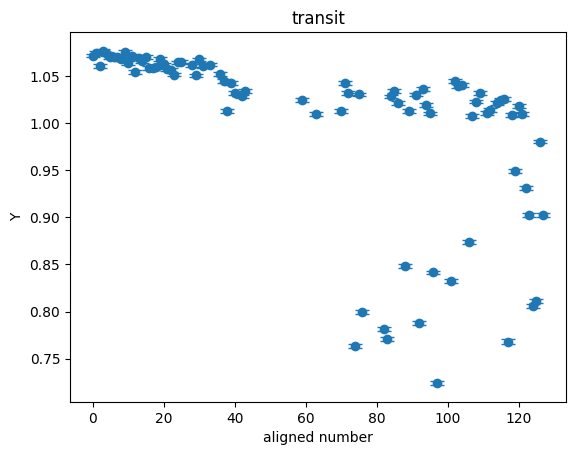

In [ ]:
x = aligned_number
y = host

#plt.scatter(x, y)
plt.errorbar(x, y, yerr=delta_ref, fmt='o', capsize=5)
plt.xlabel('aligned number')
plt.ylabel('Y')
plt.title('transit')

plt.show()

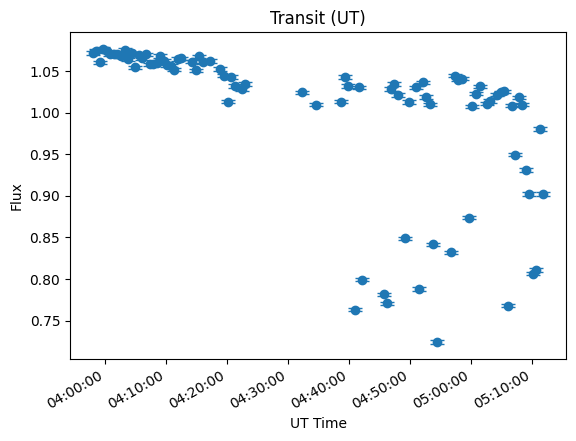

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# List of frame times in UT (as strings)
frame_times_ut = [
    "03:57:55", "03:58:30", "03:59:05", "03:59:40", "04:00:15", "04:00:50",
    "04:01:25", "04:01:59", "04:02:35", "04:03:10", "04:03:45", "04:04:20",
    "04:04:55", "04:05:30", "04:06:05", "04:06:40", "04:07:15", "04:07:49",
    "04:08:24", "04:08:59", "04:09:34", "04:10:09", "04:10:44", "04:11:19",
    "04:11:54", "04:12:29", "04:14:13", "04:14:48", "04:15:23", "04:15:58",
    "04:17:08", "04:18:52", "04:19:27", "04:20:02", "04:20:37", "04:21:12",
    "04:22:22", "04:22:57", "04:32:15", "04:34:35", "04:38:39", "04:39:14",
    "04:39:49", "04:40:59", "04:41:33", "04:42:08", "04:45:38", "04:46:13",
    "04:46:48", "04:47:22", "04:47:57", "04:49:07", "04:49:42", "04:50:52",
    "04:51:27", "04:52:01", "04:52:36", "04:53:11", "04:53:46", "04:54:21",
    "04:56:41", "04:57:15", "04:57:50", "04:58:25", "04:59:35", "05:00:10",
    "05:00:45", "05:01:20", "05:02:29", "05:03:04", "05:04:14", "05:04:49",
    "05:05:24", "05:05:59", "05:06:34", "05:07:09", "05:07:43", "05:08:18",
    "05:08:53", "05:09:28", "05:10:03", "05:10:38", "05:11:13", "05:11:48"
]

# Convert times to datetime objects
times = [datetime.strptime(t, "%H:%M:%S") for t in frame_times_ut]

# x-axis will now be the actual UT times
x = times
y = host  # Your flux data

# Plot the updated graph
plt.errorbar(x, y, yerr=delta_ref, fmt='o', capsize=5)

plt.xlabel('UT Time')
plt.ylabel('Flux')
plt.title('Transit (UT)')

# Format the x-axis to display HH:MM:SS
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()

plt.show()

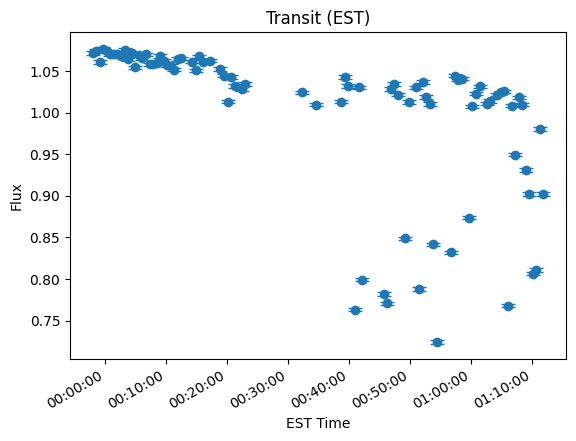

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# List of frame times in UT (as strings)
frame_times_ut = [
    "03:57:55", "03:58:30", "03:59:05", "03:59:40", "04:00:15", "04:00:50",
    "04:01:25", "04:01:59", "04:02:35", "04:03:10", "04:03:45", "04:04:20",
    "04:04:55", "04:05:30", "04:06:05", "04:06:40", "04:07:15", "04:07:49",
    "04:08:24", "04:08:59", "04:09:34", "04:10:09", "04:10:44", "04:11:19",
    "04:11:54", "04:12:29", "04:14:13", "04:14:48", "04:15:23", "04:15:58",
    "04:17:08", "04:18:52", "04:19:27", "04:20:02", "04:20:37", "04:21:12",
    "04:22:22", "04:22:57", "04:32:15", "04:34:35", "04:38:39", "04:39:14",
    "04:39:49", "04:40:59", "04:41:33", "04:42:08", "04:45:38", "04:46:13",
    "04:46:48", "04:47:22", "04:47:57", "04:49:07", "04:49:42", "04:50:52",
    "04:51:27", "04:52:01", "04:52:36", "04:53:11", "04:53:46", "04:54:21",
    "04:56:41", "04:57:15", "04:57:50", "04:58:25", "04:59:35", "05:00:10",
    "05:00:45", "05:01:20", "05:02:29", "05:03:04", "05:04:14", "05:04:49",
    "05:05:24", "05:05:59", "05:06:34", "05:07:09", "05:07:43", "05:08:18",
    "05:08:53", "05:09:28", "05:10:03", "05:10:38", "05:11:13", "05:11:48"
]

# Convert times to datetime objects
times_ut = [datetime.strptime(t, "%H:%M:%S") for t in frame_times_ut]

# Convert UT to EST (subtract 4 hours)
times_est = [t - timedelta(hours=4) for t in times_ut]

# x-axis will now be the converted EST times
x = times_est
y = host  # Your flux data

# Plot the updated graph
plt.errorbar(x, y, yerr=delta_ref, fmt='o', capsize=5)

plt.xlabel('EST Time')
plt.ylabel('Flux')
plt.title('Transit (EST)')

# Format the x-axis to display HH:MM:SS
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
def align_images(images, star_coords, center_coords):
    aligned_images = []

    for img, (star_x, star_y) in zip(images, star_coords):
        x_offset = center_coords[0] - star_x
        y_offset = center_coords[1] - star_y
        aligned_img = shift(img, shift=(y_offset, x_offset), mode='nearest')
        aligned_images.append(aligned_img)

    return aligned_images

In [ ]:
def save_aligned_images(aligned_images, ownerpath):
    for i, aligned_img in enumerate(aligned_images):
        hdu = fits.PrimaryHDU(aligned_img)
        hdu.writeto(f'{ownerpath}/Lab 2/Aligned Images/aligned_HAT_P_16_VISIBLE_LIGHT_20S_.{i}.fits', overwrite=True)

In [ ]:
# Define paths
input_directory = f'{ownerpath}/Lab 2/Subtracted Transient(withflat)/'
output_directory = f'{ownerpath}/Lab 2/Aligned Images/'

# List of your FITS files with full paths
filenames = [f'{ownerpath}/Lab 2/Subtracted Transient(withflat)/HAT_P_16_VISIBLE_LIGHT_20S_.{i}.fits' for i in [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
    16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31,
    33, 37, 38, 39, 42, 43, 59, 63, 70, 71, 72, 75, 84, 85,
    86, 89, 91, 93, 94, 95, 102, 103, 104, 107, 108, 109,
    111, 112, 114, 115, 116, 118, 120, 121, 122, 126
]]


# Star coordinates in each image
star_coords = [
    (493.338, 609.667), (490.2, 613.8), (501, 595.338), (498.6, 600.6),
    (496.2, 604.2), (513, 577.338), (540, 535.338), (537.2, 539.667),
    (533.338, 543.338), (530.5, 548.338), (528, 552.2), (524.667, 556.3),
    (522.2, 560.5), (518.338, 564.667), (516.3, 568.338), (513, 572.2),
    (510.5, 575.5), (507.2, 579.667), (503.338, 583.5), (501, 587.2),
    (489, 590.5), (494.667, 594.667), (492.2, 598.338), (488.338, 602.2),
    (485.5, 606.3), (482.2, 610.5), (473, 621.3), (470.5, 624.667),
    (466.338, 628.5), (463.338, 632.2), (457.2, 639.667), (445, 653.338),
    (441.667, 657.338), (438.667, 660.5), (429.667, 670.667), (426, 674.338),
    (410, 671.667), (396.833, 683.5), (438, 605.5), (434.667, 608),
    (431.3, 610.5), (419.667, 619.667), (386.3, 644.667), (382.167, 647.2),
    (378.833, 650.5), (368, 658), (359.667, 663.883), (352.2, 669.667),
    (348.833, 673), (344.667, 675.5), (316, 696.3), (312.2, 698.833),
    (308.5, 701.883), (394.3, 561.833), (443.833, 485.5), (492.2, 408.833),
    (484.667, 413), (481.3, 414.667), (473, 418.833), (469.667, 421.3),
    (466.3, 423), (458, 427.2), (450.5, 432.2), (446.3, 433.833),
    (442.2, 436.3), (425.5, 44.667)]

In [ ]:
# Center of the image
center_coords = (512, 512)  # For a 1024x1024 image

# Function to load images
def load_fits_images(filepaths):
    return [fits.getdata(fp) for fp in filepaths]

# Function to align images
def align_images(images, star_coords, center_coords):
    aligned_images = []
    for img, (star_x, star_y) in zip(images, star_coords):
        x_offset = center_coords[0] - star_x
        y_offset = center_coords[1] - star_y
        aligned_img = shift(img, shift=(y_offset, x_offset), mode='nearest')
        aligned_images.append(aligned_img)
    return aligned_images

# Function to save aligned images
def save_aligned_images(aligned_images, output_directory, base_name):
    for i, aligned_img in enumerate(aligned_images):
        hdu = fits.PrimaryHDU(aligned_img)
        hdu.writeto(os.path.join(output_directory, f"{base_name}.{i}.fits"), overwrite=True)

# Load images
filepaths = [os.path.join(input_directory, fname) for fname in filenames]
images = load_fits_images(filepaths)

# Align images
aligned_images = align_images(images, star_coords, center_coords)

# Save aligned images
#save_aligned_images(aligned_images, output_directory, "aligned_HAT_P_16_VISIBLE_LIGHT_20S_")

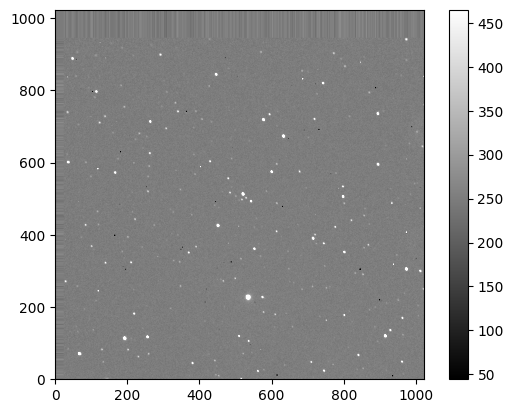

In [ ]:
plt.imshow(aligned_images[20], cmap='gray', origin='lower', vmin=np.mean(aligned_images[0])-np.std(aligned_images[0]), vmax=np.mean(aligned_images[0])+np.std(aligned_images[0]))
plt.colorbar()
plt.show()